# 1.4  Convex Hull

In [84]:
import time
import numpy as np

def ch(xy):
    t1=time.time()
    f=1
    lista=[] 
    for  h in range(len(xy)): #p
        for k in range(len(xy)):#q
                if h != k:
                    cum=0
                    for i in range(len(xy)): #r
                        p=xy[h]
                        q=xy[k]
                        r=xy[i]
                        pr=[r[0]-p[0],r[1]-p[1],1]
                        pq=[q[0]-p[0],q[1]-p[1],1]
                        f=f+1
                        c3=pq[0]*pr[1]-pr[0]*pq[1]
                        if c3<0 or pq == pr or pq == [0,0,1] or pr == [0,0,1]:
                            cum += 1
                        if cum == len(xy):
                            lista+=[[k,h]]
    
    e=[]
    e+=[lista[0][0]] #ordena
    e+=[lista[0][1]]
    p=len(lista)
    for u in range(p):
        for i in lista: 
            if i[0]==e[-1]:
                 e+=[i[1]]
    l=[]
    for y in e:
        if y not in l:
            l.append(y)
                   
        
    t2=time.time()
    return l,t2-t1,f




def genp(n):
    r=np.random.uniform(0,1,n)
    theta=np.random.uniform(0,2*np.pi,n)
    r=np.sqrt(r)

    x=r*np.cos(theta)
    y=r*np.sin(theta)

    xy=[]
    for i in range(len(x)):
        xy+=[[x[i],y[i]]]
    return xy


k=[10,20,40,80]
def promedio(k):
    w=[]
    ex=[]#n s
    lp=[]#promedio todas las n
    N=[]
    for t in range(len(k)):#
        n=k[t]
        ex+=[n] #n
        ey=[] #tiempos de cada n
        for i in range(10):
            xy=genp(n)
            b,d,f=ch(xy)
            ey+=[d]
            if f not in w:
                w.append(f)

        suma=0.0
        for i in range(len(ey)):
            suma=suma+ey[i]
        prom=suma/len(ey)
        lp+=[prom]
    return  ex,lp,w

n,m,n3=promedio(k) 

In [85]:
import matplotlib.pylab as plt
import numpy as np
from scipy import stats
%matplotlib inline
N=np.array(n)
M=np.array(m)
lnT=np.log(M)
lnN=np.log(N)

#plt.plot(lnN,lnT,"*")
xdata=np.array(lnN)
ydata=np.array(lnT)
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata,ydata)

x=range(20)
fny=[]
for i in range(20):
    fny+=[slope*i+intercept]

## 0(n) aproximadamente = n**3

la pendiente de la regresión lineal= 2.94592136017


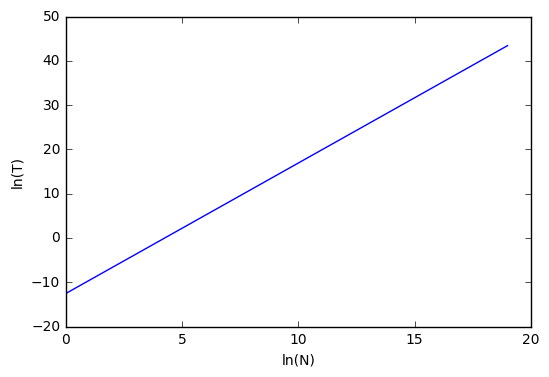

In [89]:
print "la pendiente de la regresión lineal=",slope
plt.plot(x,fny)
plt.xlabel('ln(N)')  # Colocamos la etiqueta en el eje x
plt.ylabel('ln(T)')  # Colocamos la etiqueta en el eje y
plt.show() 


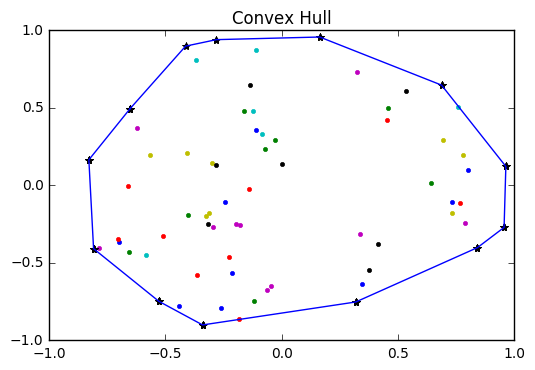

In [90]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
nlineas = len(open('input.dat').readlines())

file=open('points.dat','r')
a=[]
for i in range(nlineas):
    infile=file.readlines() 
    a+=infile
xy=[]
x1=[]
y1=[]
 
for h in range(len(a)):
    x=float(a[h].split(" ")[0])
    y=float(a[h].split(" ")[1].split("\n")[0]) 
    xy+=[[x,y]]
    plt.plot(x,y,".")
def ch(xy):
    t1=time.time()
    f=1
    lista=[] 
    for  h in range(len(xy)): #p
        for k in range(len(xy)):#q
                if h != k:
                    cum=0
                    for i in range(len(xy)): #r
                        p=xy[h]
                        q=xy[k]
                        r=xy[i]
                        pr=[r[0]-p[0],r[1]-p[1],1]
                        pq=[q[0]-p[0],q[1]-p[1],1]
                        f=f+1
                        c3=pq[0]*pr[1]-pr[0]*pq[1]
                        if c3<0 or pq == pr or pq == [0,0,1] or pr == [0,0,1]:
                            cum += 1
                        if cum == len(xy):
                            lista+=[[k,h]]
    
    e=[]
    e+=[lista[0][0]]
    e+=[lista[0][1]]
    p=len(lista)
    for u in range(p):
        for i in lista: 
            if i[0]==e[-1]:
                 e+=[i[1]]
    l=[]
    for y in e:
        if y not in l:
            l.append(y)
    l.append(e[0])
                   
        
    t2=time.time()
    return lista,l
c,l=ch(xy)
x=[]
y=[]
d=[]
for i in l:
    x+=[xy[i][0]]
    y+=[xy[i][1]]
    plt.plot(x,y,"*")
plt.title('Convex Hull') 
plt.plot(x,y,"-")  